In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

## Figure 1: uniformly concave upper bounds for (1 - exp(-x))^2

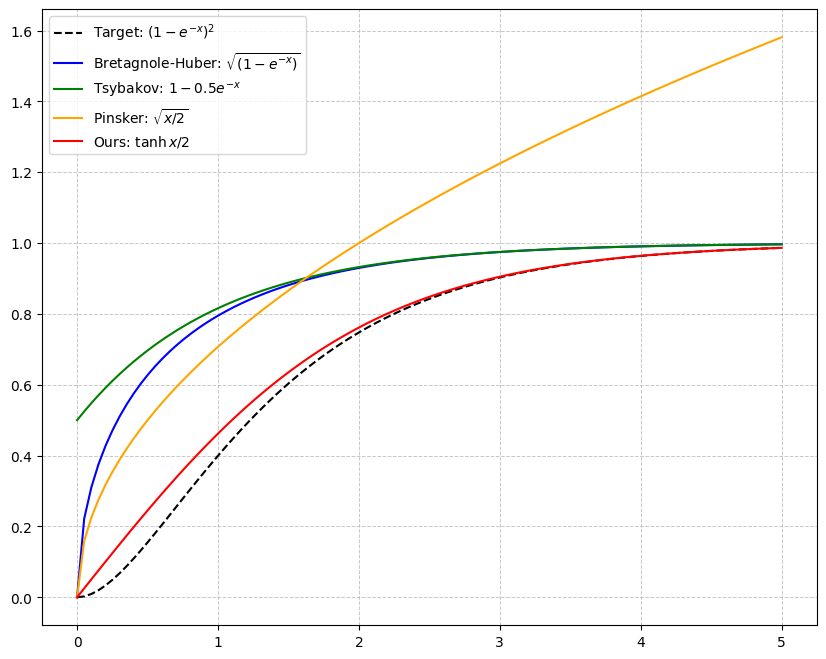

In [2]:
def target(x):
    return (1 - np.exp(-x))**2

def bretagnole_huber(x):
    return np.sqrt(1 - np.exp(-x))

def tsybakov(x):
    return 1 - 0.5 * np.exp(-x)

def pinsker(x):
    return np.sqrt(x/2)



plt.figure(figsize=(10, 8))

x = np.linspace(0, 5, 100)
plt.plot(x, target(x), linestyle="--", color="black", label=r"Target: $(1-e^{-x})^2$")
plt.plot(x, bretagnole_huber(x), color="blue", label=r"Bretagnole-Huber: $\sqrt{(1-e^{-x})}$")
plt.plot(x, tsybakov(x), color="green", label=r"Tsybakov: $1-0.5e^{-x}$")
plt.plot(x, pinsker(x), color="orange", label=r"Pinsker: $\sqrt{x/2}$")
plt.plot(x, np.tanh(x/2), color="red", label=r"Ours: $\tanh{x/2}$")

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()


## Figure 2: Upper bound for the gradient norm of the Categorical Cross Entropy loss

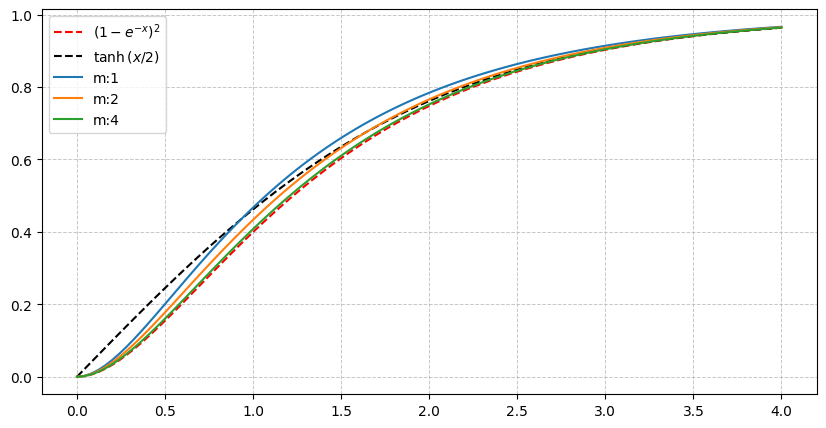

In [3]:

def cce_grad_upper_bound(x, m):
    return (1 - np.exp(-x))**2 + 2**(-m) * x**2 * np.exp(-2*x)


plt.figure(figsize=(10, 5))

x = np.linspace(0, 4, 100)
plt.plot(x, (1 - np.exp(-x))**2, linestyle="--", color="red", label=r"$(1-e^{-x})^2$")
plt.plot(x, np.tanh(x/2), linestyle="--", color="black", label=r"$\tanh{(x/2)}$")

for m in [1, 2, 4]:
    plt.plot(x, cce_grad_upper_bound(x, m), label=f"m:{m}")

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

## Figure 3: Upper bound for the gradient norm of the Binary Cross Entropy loss

/tmp/ipykernel_21155/2576039801.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('jet')  # Try also: 'viridis', 'plasma', 'magma', 'cividis'
/tmp/ipykernel_21155/2576039801.py:5: RuntimeWarning: divide by zero encountered in log
  return (1-x)**2 + mu * np.log(x)


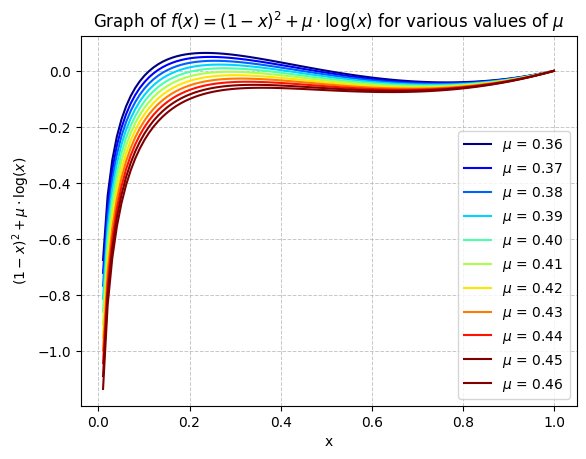

In [4]:
#We hererin compute the optimal value for mu found in Section 4.3
# f(x) = (1-x)^2 + mu * log(x)

def bce_f(x, mu):
    return (1-x)**2 + mu * np.log(x)


cmap = get_cmap('jet')  # Try also: 'viridis', 'plasma', 'magma', 'cividis'
norm = plt.Normalize(vmin=1, vmax=10)  # Normalize l values between 1 and 10


x = np.linspace(0, 1, 100)
for m in range(1, 12, 1):  # Changed to 11 to include l=10
    mu = 0.35 + m * 0.01
    y = bce_f(x, mu)
    color = cmap(norm(m))  # Get color from colormap
    plt.plot(x, y, color=color, label=rf"$\mu$ = {mu:0.2f}")

plt.xlabel("x")
plt.ylabel(r"$(1-x)^2 + \mu \cdot \log(x)$")
plt.title(rf"Graph of $f(x) = (1-x)^2 + \mu \cdot \log(x)$ for various values of $\mu$")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

In [10]:
from scipy.optimize import root_scalar


def f_max(mu):
    """ Computes f(x_max) where x_max is the argmax of f(x) = (1-x)^2 + mu * log(x) """
    sqrt_term = np.sqrt(1 - 2 * mu)
    x_max = (1 - sqrt_term) / 2
    
    term1 = (1 + sqrt_term - mu) / 2
    term2 = mu * np.log(x_max)
    return term1 + term2

# Find mu where f(x_max) = 0 in [0.4, 0.5]
# Since f(x_max) decreases as mu increases (check f_x_max(0.4) and f_x_max(0.5)), we can use root_scalar.
try:
    sol = root_scalar(f_max, bracket=[0.4, 0.5], method='brentq')
    mu_opt = sol.root
    print(f"Optimal mu where f(x_max) = 0: {mu_opt:.6f}")
    print(f"Verification f(x_max) at mu_opt: {f_max(mu_opt):.2e} (should be close to 0)")
except ValueError as e:
    print(f"Error: {e}")
    print("Try adjusting the bracket or checking the function behavior.")

Optimal mu where f(x_max) = 0: 0.407264
Verification f(x_max) at mu_opt: -3.67e-14 (should be close to 0)


/tmp/ipykernel_21155/4250789074.py:2: RuntimeWarning: divide by zero encountered in log
  return - mu * np.log(x)


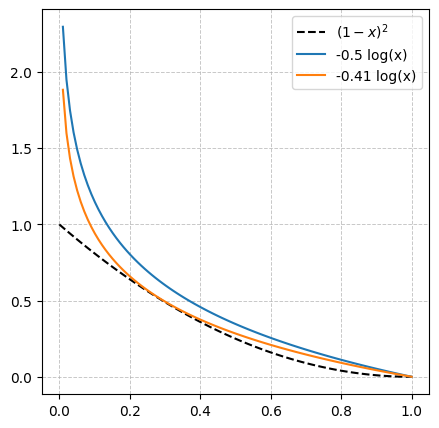

In [6]:
def bce_grad_upper_bound(x, mu):
    return - mu * np.log(x)


plt.figure(figsize=(5, 5))

x = np.linspace(0, 1, 100)
plt.plot(x, (1 - x)**2, linestyle="--", color="black", label=r"$(1-x)^2$")

for mu in [0.5, 0.41]:
    plt.plot(x, bce_grad_upper_bound(x, mu), label=f"-{mu} log(x)")

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

## Figure 4 : Bienaymé-Tchevychev bounds

/tmp/ipykernel_21155/14404949.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('jet')  # Try also: 'viridis', 'plasma', 'magma', 'cividis'


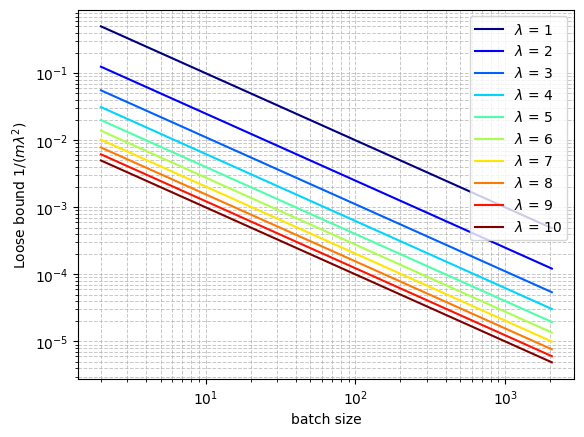

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

m = np.asarray([2**k for k in range(1, 12)])

# Create a colormap (jet is default, but you can choose others: viridis, plasma, etc.)
cmap = get_cmap('jet')  # Try also: 'viridis', 'plasma', 'magma', 'cividis'
norm = plt.Normalize(vmin=1, vmax=10)  # Normalize l values between 1 and 10

for l in range(1, 11):  # Changed to 11 to include l=10
    x = m
    y = 1/(m * l**2)
    color = cmap(norm(l))  # Get color from colormap
    plt.plot(x, y, color=color, label=rf"$\lambda$ = {l}")

plt.legend()
plt.loglog()
plt.xlabel("batch size")
plt.ylabel(r"Loose bound $1/(m \lambda^2)$")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add colorbar to show the l-value to color mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#plt.colorbar(sm, label='l value', ticks=range(1, 11))
plt.show()

/tmp/ipykernel_21155/3129185249.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('jet')  # Try also: 'viridis', 'plasma', 'magma', 'cividis'
/tmp/ipykernel_21155/3129185249.py:10: RuntimeWarning: divide by zero encountered in divide
  y = (1 - r)/(r * l**2 * (n-1))


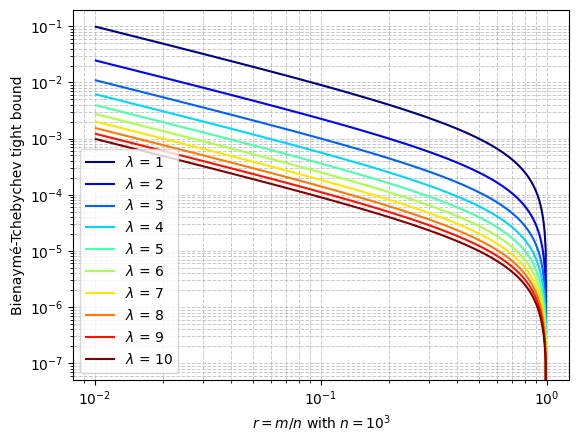

In [8]:
r = np.linspace(0, 1, 100)

# Create a colormap (jet is default, but you can choose others: viridis, plasma, etc.)
cmap = get_cmap('jet')  # Try also: 'viridis', 'plasma', 'magma', 'cividis'
norm = plt.Normalize(vmin=1, vmax=10)  # Normalize l values between 1 and 10
n = 1_000

for l in range(1, 11):  # Changed to 11 to include l=10
    x = r
    y = (1 - r)/(r * l**2 * (n-1))
    color = cmap(norm(l))  # Get color from colormap
    plt.plot(x, y, color=color, label=rf"$\lambda$ = {l}")

plt.legend()
plt.loglog()
plt.xlabel(r"$r =m / n$ with $n=10^3$")
plt.ylabel("Bienaymé-Tchebychev tight bound")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add colorbar to show the l-value to color mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#plt.colorbar(sm, label='l value', ticks=range(1, 11))
plt.show()